In [2]:
import numpy as np
import pprint as pp
from matplotlib import pyplot as plt
import shutil
import os

In [3]:
instances = ["kroA200", "kroB200"]
algorithms = ["random", "local_search_steepest", "heuristic", "candidate_moves", "cache_moves"]

In [5]:
data = {}

for i in instances:
    if i not in data:
        data[i] = {}
    for a in algorithms:
        if a not in data[i]:
            data[i][a] = []

        file_path = "build/output/" + a + "/" + i + ".txt"

        with open(file_path, "r") as file:
            for line in file:
                line = line.strip().split()
                run_nr = int(line[0][:-1])
                length = int(line[1])
                if a != "random":
                    time = int(line[2])
                    cycle = list(map(int, line[3:]))
                else:
                    time = 0
                    cycle = list(map(int, line[2:]))
                data[i][a].append({"run_nr": run_nr, "length": length, "time": time, "cycle": cycle})

In [6]:
pp.pprint(data)

{'kroA200': {'cache_moves': [{'cycle': [56,
                                        62,
                                        39,
                                        40,
                                        115,
                                        80,
                                        81,
                                        31,
                                        98,
                                        58,
                                        181,
                                        147,
                                        126,
                                        32,
                                        100,
                                        154,
                                        127,
                                        89,
                                        50,
                                        34,
                                        82,
                                        9,
                          

In [7]:
def visualize_cycles(data, cycles, path):
     plt.figure(figsize=(8, 6))

     for node, (x, y) in data.items():
         plt.scatter(x, y, color='red', s=30)
         plt.text(x, y, str(node), fontsize=8, ha='left', va='bottom')

     colors = ['blue', 'green', 'orange', 'purple', 'cyan']
     for i, cycle in enumerate(cycles):
         cycle_x = [data[node][0] for node in cycle]
         cycle_y = [data[node][1] for node in cycle]
         cycle_x.append(cycle_x[0])
         cycle_y.append(cycle_y[0])
         plt.plot(cycle_x, cycle_y, linestyle='-', color=colors[i % len(colors)])

     plt.title('Visualization of Cycles')
     plt.xlabel('X-coordinate')
     plt.ylabel('Y-coordinate')
     plt.grid(True)
    #  plt.show()
     plt.savefig(path)

In [8]:
tsp_data = {
    "kroA200": {},
    "kroB200": {}
}

with open('kroA200.tsp', 'r') as file:
    for line in file:
        if line.startswith('EOF'):
            break
        parts = line.split()
        if parts[0].isdigit():
            node, x, y = map(int, parts)
            tsp_data["kroA200"][node] = (x, y)

with open('kroB200.tsp', 'r') as file:
    for line in file:
        if line.startswith('EOF'):
            break
        parts = line.split()
        if parts[0].isdigit():
            node, x, y = map(int, parts)
            tsp_data["kroB200"][node] = (x, y)

In [9]:
pp.pprint(tsp_data)

{'kroA200': {1: (1357, 1905),
             2: (2650, 802),
             3: (1774, 107),
             4: (1307, 964),
             5: (3806, 746),
             6: (2687, 1353),
             7: (43, 1957),
             8: (3092, 1668),
             9: (185, 1542),
             10: (834, 629),
             11: (40, 462),
             12: (1183, 1391),
             13: (2048, 1628),
             14: (1097, 643),
             15: (1838, 1732),
             16: (234, 1118),
             17: (3314, 1881),
             18: (737, 1285),
             19: (779, 777),
             20: (2312, 1949),
             21: (2576, 189),
             22: (3078, 1541),
             23: (2781, 478),
             24: (705, 1812),
             25: (3409, 1917),
             26: (323, 1714),
             27: (1660, 1556),
             28: (3729, 1188),
             29: (693, 1383),
             30: (2361, 640),
             31: (2433, 1538),
             32: (554, 1825),
             33: (913, 317),
            

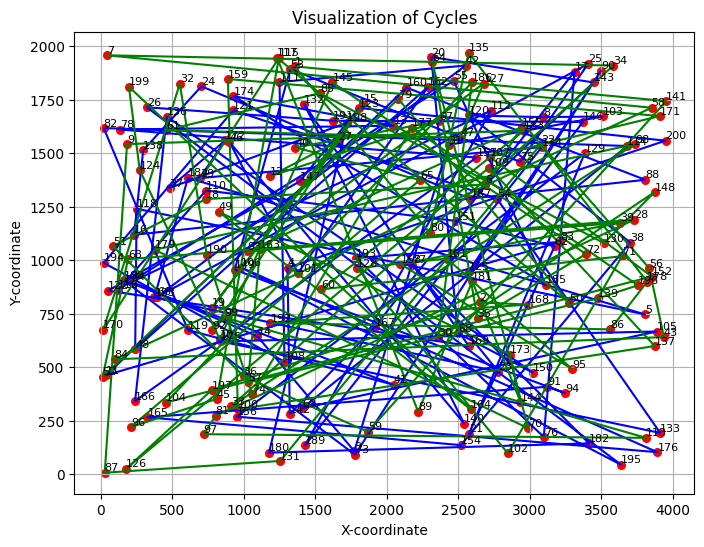

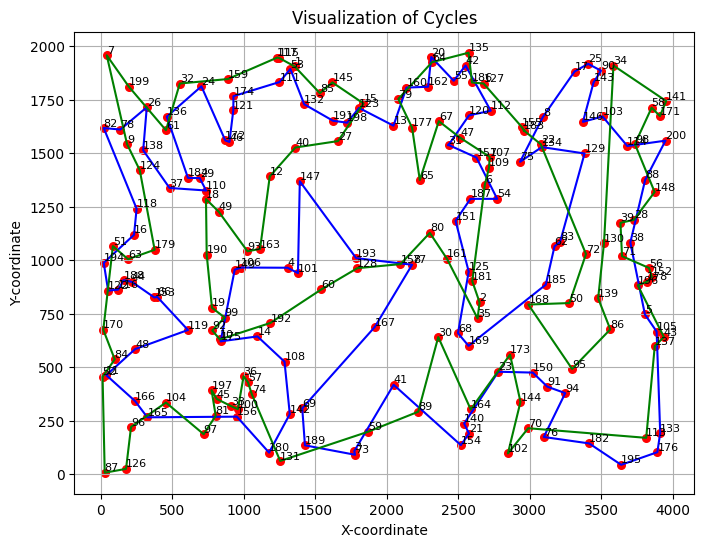

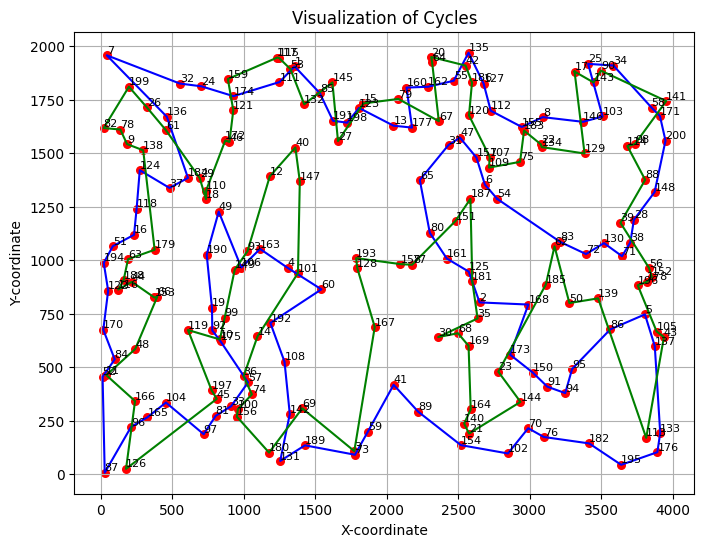

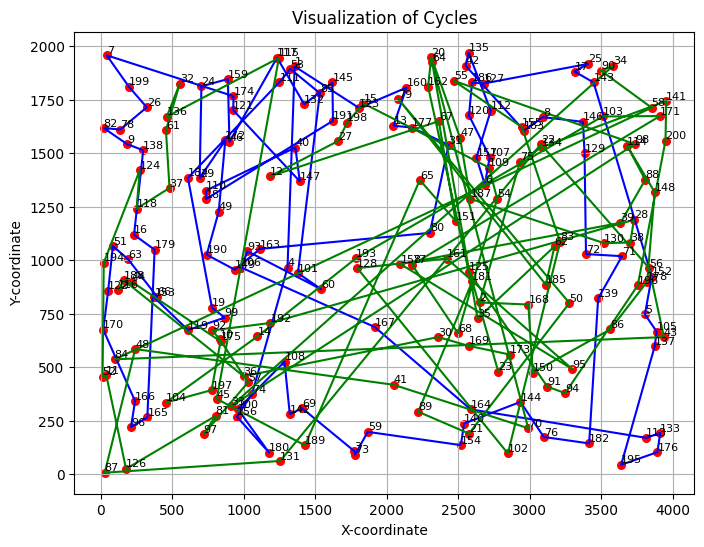

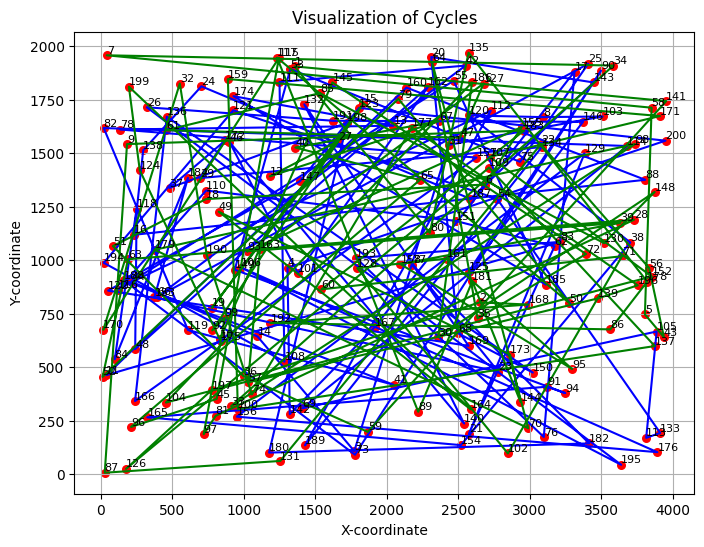

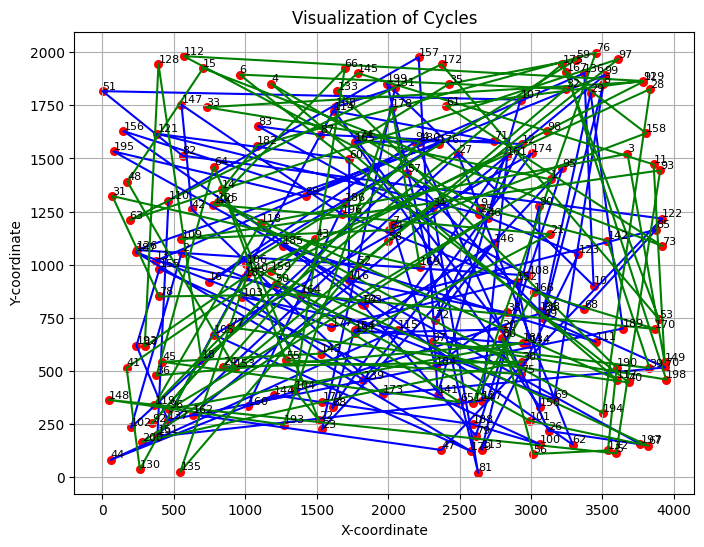

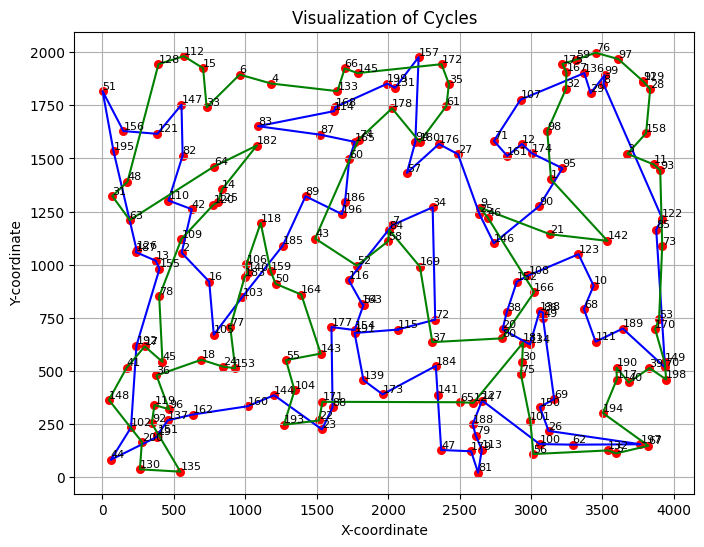

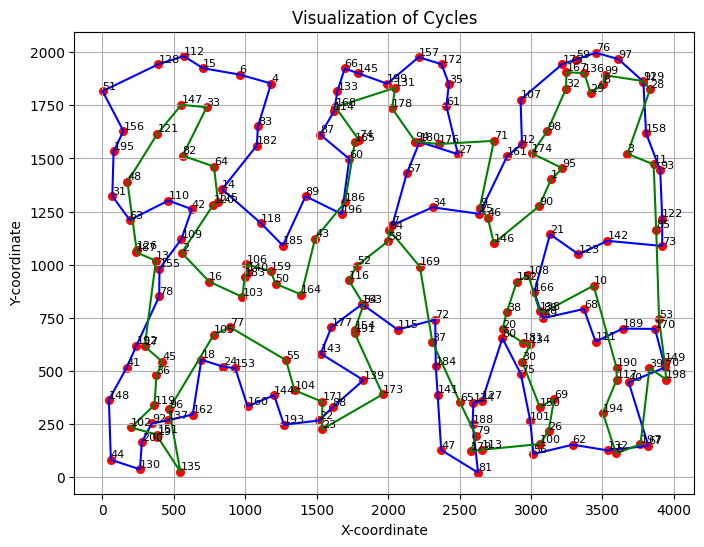

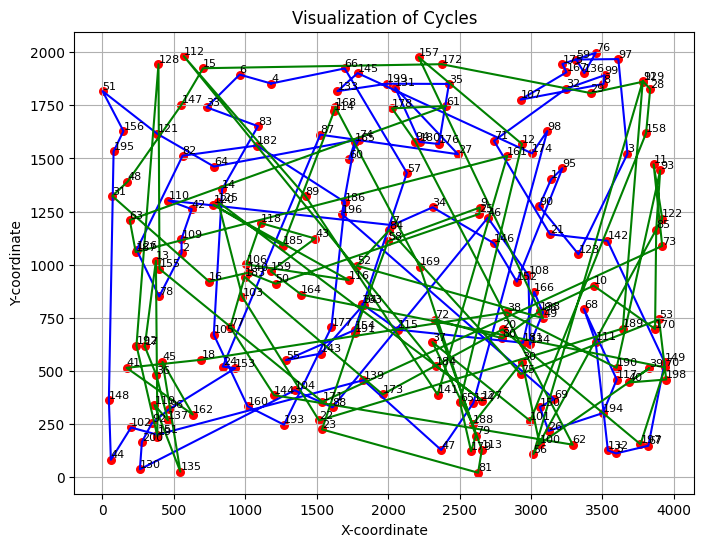

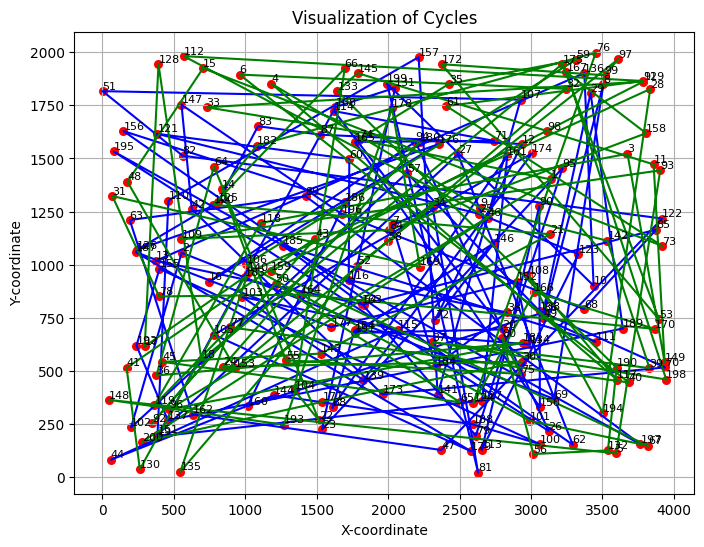

In [10]:
shutil.rmtree("plots2", ignore_errors=True)
os.mkdir("plots2")

for tsp_instance in data.keys():
    for method in data[tsp_instance].keys():
        path_to_plot = f"plots2/{tsp_instance}_{method}.png"
        data[tsp_instance][method].sort(key=lambda x: x["length"])
        assert data[tsp_instance][method][0]["run_nr"] == data[tsp_instance][method][1]["run_nr"]

        first_cycle = data[tsp_instance][method][0]["cycle"]
        second_cycle = data[tsp_instance][method][1]["cycle"]

        cycles = [first_cycle, second_cycle]
        visualize_cycles(tsp_data[tsp_instance], cycles, path_to_plot)

In [14]:
tsp_instance = "kroA100"
for method in data[tsp_instance].keys():
    for neighbour in data[tsp_instance][method].keys():
        for beginning in data[tsp_instance][method][neighbour].keys():
            path_to_plotA = f"local-search/plots/{tsp_instance}_{method}_{neighbour}_{beginning}.png"
            path_to_plotB = f"local-search/plots/kroB100_{method}_{neighbour}_{beginning}.png"
            string = f"| {method} {neighbour} {beginning} | ![{method}_{neighbour}_{beginning}_A]({path_to_plotA}) | ![{method}_{neighbour}_{beginning}_B]({path_to_plotB}) |"
            print(string)

| steepest inner random | ![steepest_inner_random_A](local-search/plots/kroA100_steepest_inner_random.png) | ![steepest_inner_random_B](local-search/plots/kroB100_steepest_inner_random.png) |
| steepest inner heuristic | ![steepest_inner_heuristic_A](local-search/plots/kroA100_steepest_inner_heuristic.png) | ![steepest_inner_heuristic_B](local-search/plots/kroB100_steepest_inner_heuristic.png) |
| steepest between random | ![steepest_between_random_A](local-search/plots/kroA100_steepest_between_random.png) | ![steepest_between_random_B](local-search/plots/kroB100_steepest_between_random.png) |
| steepest between heuristic | ![steepest_between_heuristic_A](local-search/plots/kroA100_steepest_between_heuristic.png) | ![steepest_between_heuristic_B](local-search/plots/kroB100_steepest_between_heuristic.png) |
| greedy inner random | ![greedy_inner_random_A](local-search/plots/kroA100_greedy_inner_random.png) | ![greedy_inner_random_B](local-search/plots/kroB100_greedy_inner_random.png) |


In [15]:
for tsp_instance in data.keys():
    for method in data[tsp_instance].keys():
        for neighbour in data[tsp_instance][method].keys():
            for beginning in data[tsp_instance][method][neighbour].keys():
                path_to_plot = f"plots/{tsp_instance}_{method}_{neighbour}_{beginning}.png"
                lengths = np.array([l["length"] for l in data[tsp_instance][method][neighbour][beginning]])
                print(f"| {tsp_instance} | {method} {neighbour} {beginning} | {lengths.mean()} ({lengths.min()} - {lengths.max()}) |")
                

| kroA100 | steepest inner random | 33850.48 (30748 - 37235) |
| kroA100 | steepest inner heuristic | 26816.29 (23281 - 30188) |
| kroA100 | steepest between random | 52106.15 (38477 - 65723) |
| kroA100 | steepest between heuristic | 31614.32 (28693 - 35183) |
| kroA100 | greedy inner random | 34626.56 (32004 - 37591) |
| kroA100 | greedy inner heuristic | 27355.74 (23205 - 30087) |
| kroA100 | greedy between random | 43523.76 (34830 - 55226) |
| kroA100 | greedy between heuristic | 31979.32 (28842 - 35430) |
| kroA100 | random inner heuristic | 137510.65 (105824 - 181527) |
| kroB100 | steepest inner random | 34322.2 (31362 - 37957) |
| kroB100 | steepest inner heuristic | 25734.14 (22611 - 28522) |
| kroB100 | steepest between random | 51643.1 (42161 - 63426) |
| kroB100 | steepest between heuristic | 31399.98 (28593 - 34053) |
| kroB100 | greedy inner random | 34657.0 (32734 - 37167) |
| kroB100 | greedy inner heuristic | 26065.38 (23122 - 30020) |
| kroB100 | greedy between random